Rs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
columns=['Age','WorkClass','Fnlwgt','Education','Education_num','Marital_status','Ocupation','Relationship','Race','Sex','Capital_gain','Capital_loss','Hours_per_week','Native-country','Target']
Data=pd.read_csv('Income_Data.csv',names=columns,header=0,na_values=' ?')
Data.head(50)

,Age,WorkClass,Fnlwgt,Education,Education_num,Marital_status,Ocupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native-country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


# Exploratory Data Analysis

In [3]:
Data.shape

(32560, 15)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
Age               32560 non-null int64
WorkClass         30724 non-null object
Fnlwgt            32560 non-null int64
Education         32560 non-null object
Education_num     32560 non-null int64
Marital_status    32560 non-null object
Ocupation         30717 non-null object
Relationship      32560 non-null object
Race              32560 non-null object
Sex               32560 non-null object
Capital_gain      32560 non-null int64
Capital_loss      32560 non-null int64
Hours_per_week    32560 non-null int64
Native-country    31977 non-null object
Target            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Statistical Summary

In [5]:
Data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
Data.apply(lambda x:len(x.unique()))

Age                  73
WorkClass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Ocupation            15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native-country       42
Target                2
dtype: int64

In [7]:
Data.isnull().sum()

Age                  0
WorkClass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Ocupation         1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native-country     583
Target               0
dtype: int64

In [8]:
#AS the the number of Missing value is very high so we drop the observations with Null values.
Data=Data.dropna()
Data.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Ocupation         0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native-country    0
Target            0
dtype: int64

In [9]:
Data.shape

(30161, 15)

In [10]:
#Here Prediction task is to determine whether a person makes over 50K a year or not.(It has only 2 targets means it is a classification problem)
#So we convert it from catagorical values to integer by mapping method
Data.Target.value_counts()

 <=50K    22653
 >50K      7508
Name: Target, dtype: int64

In [11]:
Data['Target']=Data['Target'].map({' <=50K':0,' >50K':1})
Data.head()

,Age,WorkClass,Fnlwgt,Education,Education_num,Marital_status,Ocupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native-country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [12]:
Data.Target.dtype

dtype('int64')

In [13]:
Data.WorkClass.value_counts

<bound method IndexOpsMixin.value_counts of 0         Self-emp-not-inc
1                  Private
2                  Private
3                  Private
4                  Private
               ...        
32555              Private
32556              Private
32557              Private
32558              Private
32559         Self-emp-inc
Name: WorkClass, Length: 30161, dtype: object>

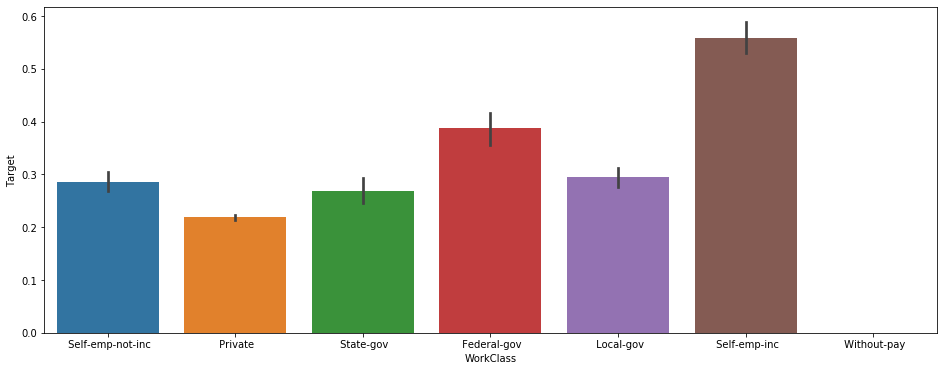

In [14]:
plt.figure(figsize=(16,6))
sns.barplot(x='WorkClass',y='Target',data=Data)

In [15]:
Data.Education.value_counts()

 HS-grad         9840
 Some-college    6678
 Bachelors       5043
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: Education, dtype: int64

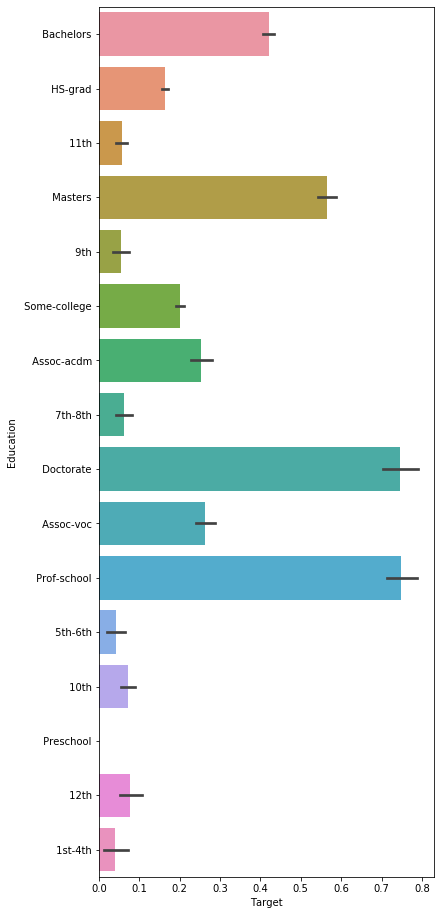

In [16]:
plt.figure(figsize=(6,16))
sns.barplot(y='Education',x='Target',data=Data)

In [17]:
Data.Education_num.value_counts()

9     9840
10    6678
13    5043
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: Education_num, dtype: int64

In [18]:
Data.Marital_status.value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: Marital_status, dtype: int64

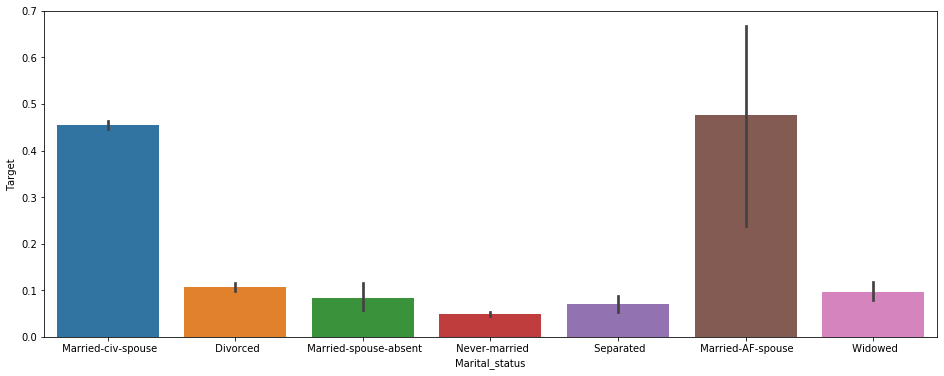

In [19]:
plt.figure(figsize=(16,6))
sns.barplot(x='Marital_status',y='Target',data=Data)

In [20]:
Data.Ocupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3720
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: Ocupation, dtype: int64

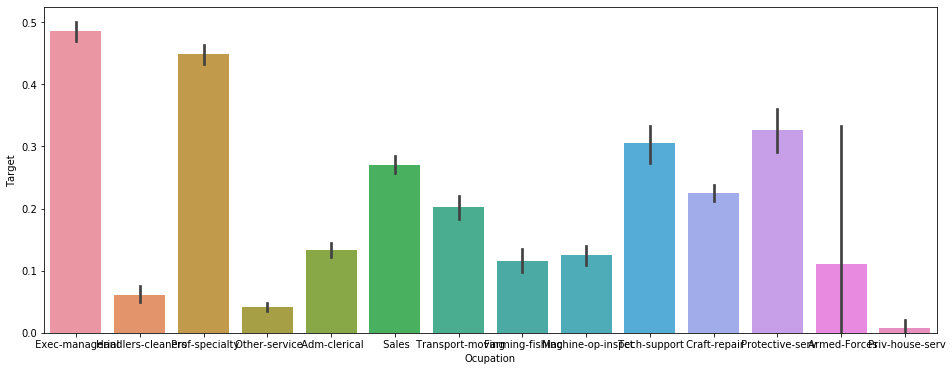

In [21]:
plt.figure(figsize=(16,6))
sns.barplot(x='Ocupation',y='Target',data=Data)

In [22]:
Data.Relationship.value_counts()

 Husband           12463
 Not-in-family      7725
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      889
Name: Relationship, dtype: int64

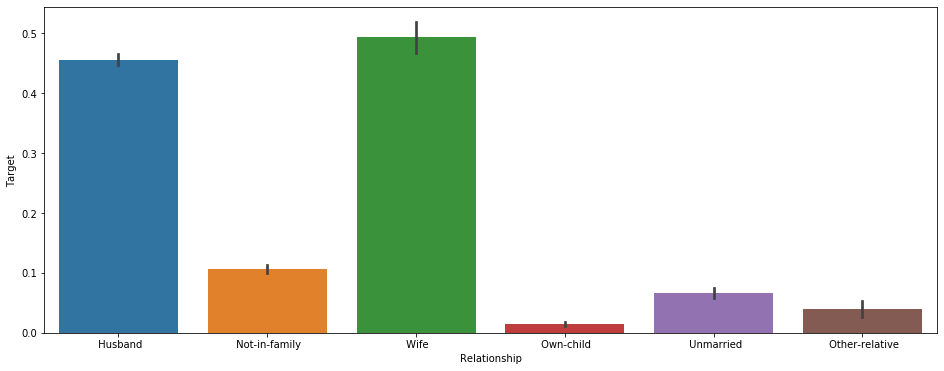

In [23]:
plt.figure(figsize=(16,6))
sns.barplot(x='Relationship',y='Target',data=Data)

In [24]:
Data.Race.value_counts()

 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: Race, dtype: int64

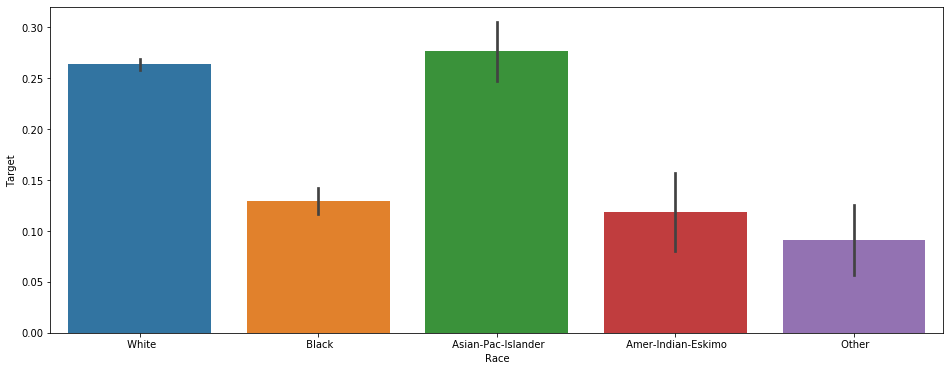

In [25]:
plt.figure(figsize=(16,6))
sns.barplot(x='Race',y='Target',data=Data)

In [26]:
Data.Sex.value_counts()

 Male      20379
 Female     9782
Name: Sex, dtype: int64

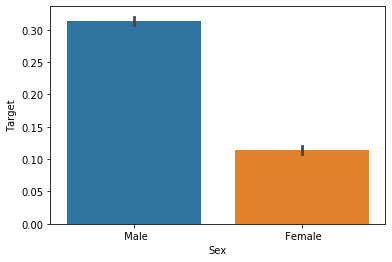

In [27]:
sns.barplot(x='Sex',y='Target',data=Data)

In [28]:
Data['Native-country'].value_counts()

 United-States                 27503
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Taiwan                           42
 Haiti                            42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

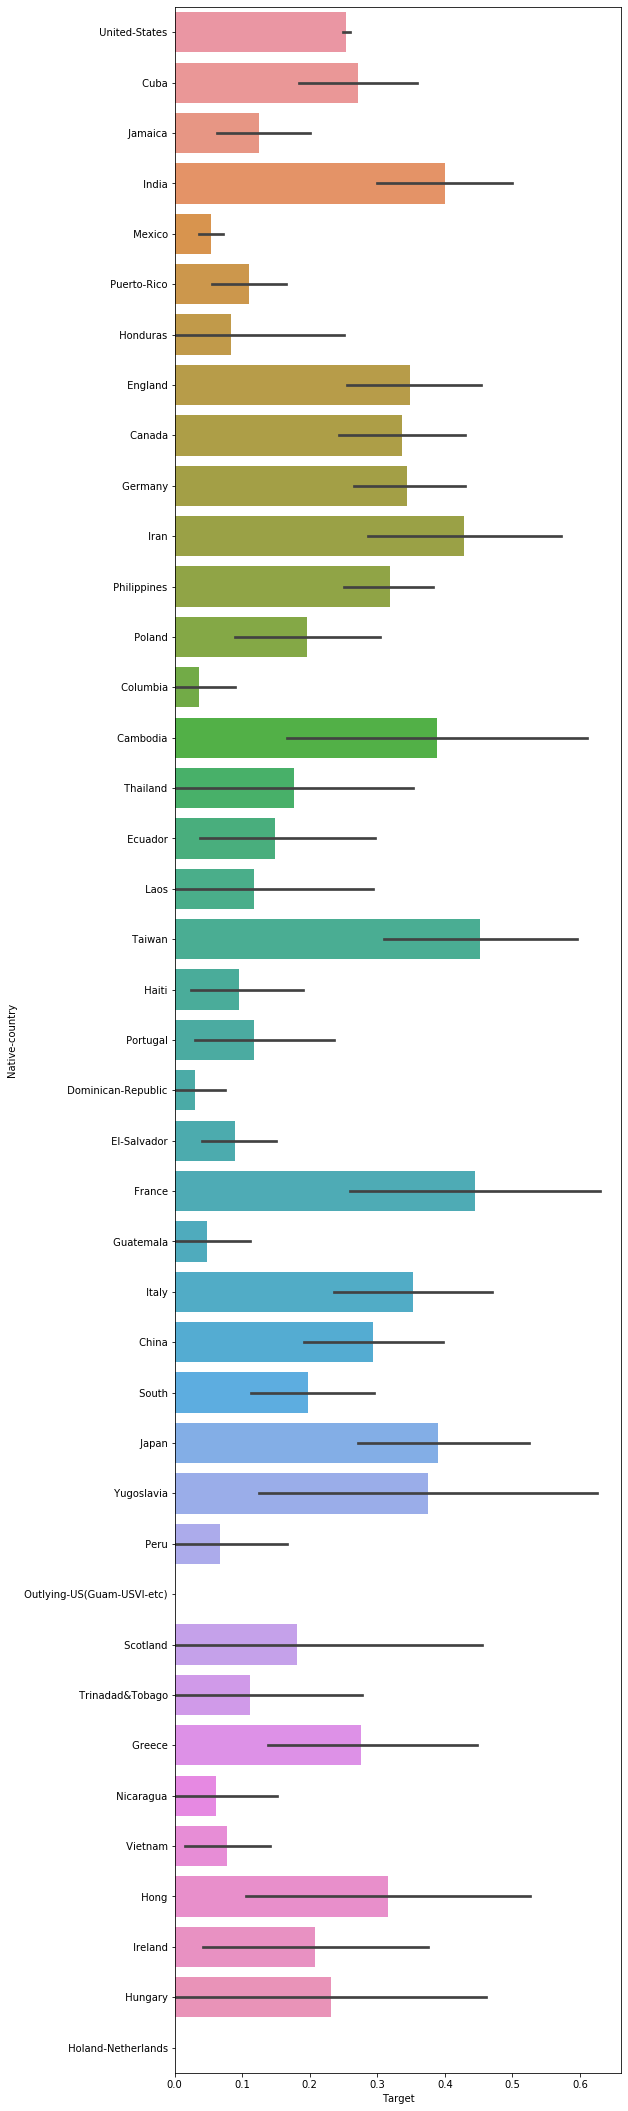

In [29]:
plt.figure(figsize=(8,38))
sns.barplot(y='Native-country',x='Target',data=Data)

In [30]:
cat_variables=Data.select_dtypes(include=[np.object])
cat_variables

,WorkClass,Education,Marital_status,Ocupation,Relationship,Race,Sex,Native-country
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [31]:
#Droping Education column as Education_num is its numerical representation
Data.drop(['Education'],axis=1,inplace=True)
Data.head()

,Age,WorkClass,Fnlwgt,Education_num,Marital_status,Ocupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native-country,Target
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [32]:
#Now we will encode the categorical values to numericals.
cols=['WorkClass','Marital_status','Ocupation','Relationship','Race','Sex','Native-country']
le=LabelEncoder()
for i in cols:
    Data[i]=le.fit_transform(Data[i])

In [33]:
Data

,Age,WorkClass,Fnlwgt,Education_num,Marital_status,Ocupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native-country,Target
0,50,4,83311,13,2,3,0,4,1,0,0,13,38,0
1,38,2,215646,9,0,5,1,4,1,0,0,40,38,0
2,53,2,234721,7,2,5,0,2,1,0,0,40,38,0
3,28,2,338409,13,2,9,5,2,0,0,0,40,4,0
4,37,2,284582,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,12,2,12,5,4,0,0,0,38,38,0
32556,40,2,154374,9,2,6,0,4,1,0,0,40,38,1
32557,58,2,151910,9,6,0,4,4,0,0,0,40,38,0
32558,22,2,201490,9,4,0,3,4,1,0,0,20,38,0


Checking For Correlation

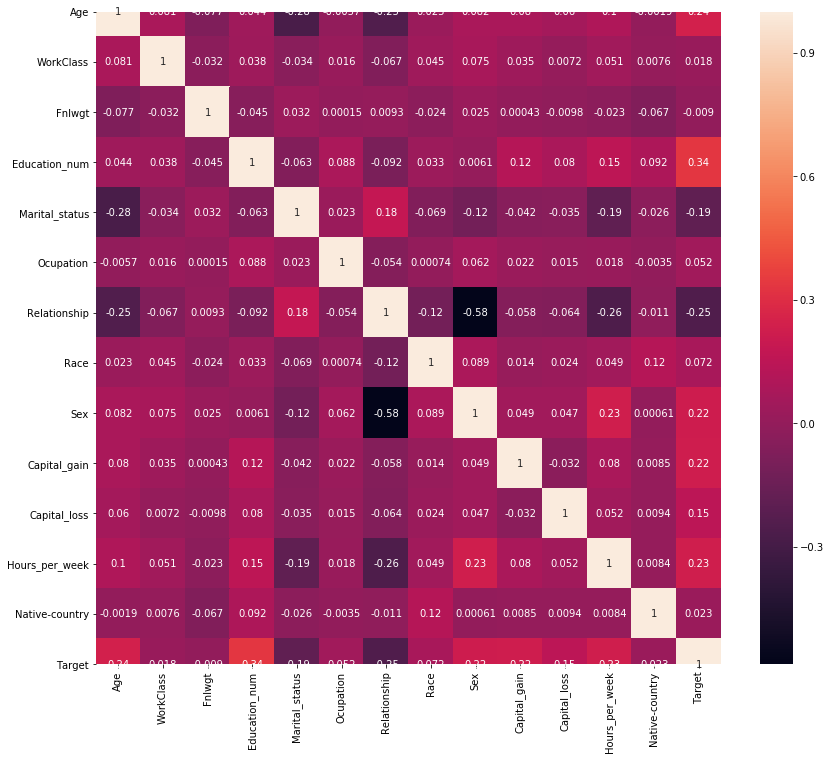

In [34]:
cor=Data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(cor,annot=True)

Checking for outliers

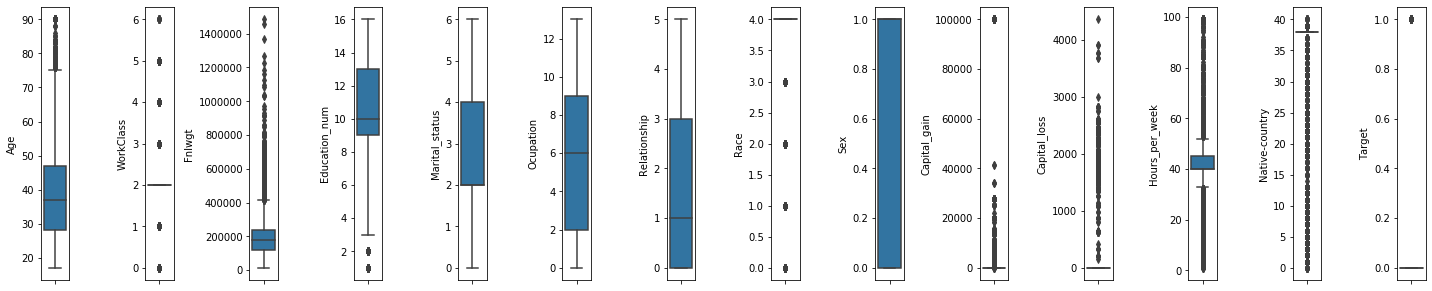

In [35]:
collist=Data.columns
ncol=20
nrow=14
plt.figure(figsize=(ncol,4*ncol))
for i in range(0,len(collist)):
    plt.subplot(ncol,nrow,i+1)
    sns.boxplot(Data[collist[i]],orient='v')
    plt.tight_layout()

Checking for Skewness

In [36]:
Data.skew()

Age                0.530223
WorkClass          1.154786
Fnlwgt             1.459212
Education_num     -0.305328
Marital_status    -0.009387
Ocupation          0.110420
Relationship       0.820275
Race              -2.506976
Sex               -0.750584
Capital_gain      11.902511
Capital_loss       4.526294
Hours_per_week     0.330856
Native-country    -4.178826
Target             1.161357
dtype: float64

In [37]:
#Removing the outliers
from scipy.stats import zscore
z=np.abs(zscore(Data))
z

array([[0.880275  , 1.88801789, 1.00790871, ..., 2.33149486, 0.26492864,
        0.57570403],
       [0.03333799, 0.20888368, 0.24465878, ..., 0.07773541, 0.26492864,
        0.57570403],
       [1.10867824, 0.20888368, 0.42520607, ..., 0.07773541, 0.26492864,
        0.57570403],
       ...,
       [1.48935032, 0.20888368, 0.35861051, ..., 0.07773541, 0.26492864,
        0.57570403],
       [1.25148865, 0.20888368, 0.11067045, ..., 1.74718685, 0.26492864,
        0.57570403],
       [1.03254383, 0.8395671 , 0.92880758, ..., 0.07773541, 0.26492864,
        1.73700365]])

In [38]:
Data_new=Data[(z<3).all(axis=1)]
Data_new

,Age,WorkClass,Fnlwgt,Education_num,Marital_status,Ocupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native-country,Target
0,50,4,83311,13,2,3,0,4,1,0,0,13,38,0
1,38,2,215646,9,0,5,1,4,1,0,0,40,38,0
2,53,2,234721,7,2,5,0,2,1,0,0,40,38,0
4,37,2,284582,14,2,3,5,4,0,0,0,40,38,0
5,49,2,160187,5,3,7,1,2,0,0,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,12,2,12,5,4,0,0,0,38,38,0
32556,40,2,154374,9,2,6,0,4,1,0,0,40,38,1
32557,58,2,151910,9,6,0,4,4,0,0,0,40,38,0
32558,22,2,201490,9,4,0,3,4,1,0,0,20,38,0


In [39]:
print(Data.shape)
print(Data_new.shape)

(30161, 14)
(25759, 14)


In [40]:
Data_new.skew()

Age                0.443409
WorkClass          1.183942
Fnlwgt             0.627870
Education_num     -0.135184
Marital_status    -0.039587
Ocupation          0.122604
Relationship       0.788039
Race              -2.641835
Sex               -0.719849
Capital_gain       4.844071
Capital_loss      28.905177
Hours_per_week    -0.285632
Native-country    -5.337123
Target             1.269653
dtype: float64

In [41]:
column=['WorkClass','Fnlwgt','Relationship','Race','Sex','Capital_gain','Capital_loss','Native-country','Target']
for i in column:
    Data_new[i]=np.sqrt(Data_new[i])

In [42]:
Data_new.skew()

Age                0.443409
WorkClass         -1.224362
Fnlwgt            -0.110798
Education_num     -0.135184
Marital_status    -0.039587
Ocupation          0.122604
Relationship       0.153242
Race              -2.649532
Sex               -0.719849
Capital_gain       3.640231
Capital_loss      26.003379
Hours_per_week    -0.285632
Native-country    -5.433095
Target             1.269653
dtype: float64

In [43]:
column=['WorkClass','Fnlwgt','Relationship','Race','Sex','Capital_gain','Capital_loss','Native-country','Target']
for i in column:
    Data[i]=np.sqrt(Data[i])

In [44]:
Data_new.skew()

Age                0.443409
WorkClass         -1.224362
Fnlwgt            -0.110798
Education_num     -0.135184
Marital_status    -0.039587
Ocupation          0.122604
Relationship       0.153242
Race              -2.649532
Sex               -0.719849
Capital_gain       3.640231
Capital_loss      26.003379
Hours_per_week    -0.285632
Native-country    -5.433095
Target             1.269653
dtype: float64

In [45]:
Data_new['Capital_loss']=np.sqrt(Data_new['Capital_loss'])
Data_new['Capital_loss'].skew()

24.908879120087253

In [46]:
Data_new['Capital_loss']=np.sqrt(np.sqrt(np.sqrt(np.sqrt(Data_new['Capital_loss']))))
Data_new['Capital_loss'].skew()

24.417928383693106

In [47]:
Data_new['Capital_loss']=np.sqrt(Data_new['Capital_loss'])
Data_new['Capital_loss'].skew()

24.41612654918879

In [48]:
Data_new['Race']=np.sqrt(Data_new['Race'])
Data_new['Race'].skew()

-2.653354742497681

In [49]:
Data_new

,Age,WorkClass,Fnlwgt,Education_num,Marital_status,Ocupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native-country,Target
0,50,2.000000,288.636450,13,2,3,0.000000,1.414214,1.0,0.000000,0.0,13,6.164414,0.0
1,38,1.414214,464.377002,9,0,5,1.000000,1.414214,1.0,0.000000,0.0,40,6.164414,0.0
2,53,1.414214,484.480134,7,2,5,0.000000,1.189207,1.0,0.000000,0.0,40,6.164414,0.0
4,37,1.414214,533.462276,14,2,3,2.236068,1.414214,0.0,0.000000,0.0,40,6.164414,0.0
5,49,1.414214,400.233682,5,3,7,1.000000,1.189207,0.0,0.000000,0.0,16,4.690416,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,1.414214,507.249446,12,2,12,2.236068,1.414214,0.0,0.000000,0.0,38,6.164414,0.0
32556,40,1.414214,392.904569,9,2,6,0.000000,1.414214,1.0,0.000000,0.0,40,6.164414,1.0
32557,58,1.414214,389.756334,9,6,0,2.000000,1.414214,0.0,0.000000,0.0,40,6.164414,0.0
32558,22,1.414214,448.876375,9,4,0,1.732051,1.414214,1.0,0.000000,0.0,20,6.164414,0.0


In [50]:
df_x=Data_new.iloc[:,0:-1]
df_x

,Age,WorkClass,Fnlwgt,Education_num,Marital_status,Ocupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native-country
0,50,2.000000,288.636450,13,2,3,0.000000,1.414214,1.0,0.000000,0.0,13,6.164414
1,38,1.414214,464.377002,9,0,5,1.000000,1.414214,1.0,0.000000,0.0,40,6.164414
2,53,1.414214,484.480134,7,2,5,0.000000,1.189207,1.0,0.000000,0.0,40,6.164414
4,37,1.414214,533.462276,14,2,3,2.236068,1.414214,0.0,0.000000,0.0,40,6.164414
5,49,1.414214,400.233682,5,3,7,1.000000,1.189207,0.0,0.000000,0.0,16,4.690416
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,1.414214,507.249446,12,2,12,2.236068,1.414214,0.0,0.000000,0.0,38,6.164414
32556,40,1.414214,392.904569,9,2,6,0.000000,1.414214,1.0,0.000000,0.0,40,6.164414
32557,58,1.414214,389.756334,9,6,0,2.000000,1.414214,0.0,0.000000,0.0,40,6.164414
32558,22,1.414214,448.876375,9,4,0,1.732051,1.414214,1.0,0.000000,0.0,20,6.164414


In [51]:
y=Data_new.iloc[:,-1].values.reshape(-1,1)
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,Age,WorkClass,Fnlwgt,Education_num,Marital_status,Ocupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native-country
0,0.929683,1.552717,-1.125841,1.207821,-0.384626,-0.722468,-1.090689,0.338062,0.702890,-0.281713,-0.040891,-2.544536,0.189381
1,-0.002047,-0.054444,0.423693,-0.462031,-1.707932,-0.228983,0.142602,0.338062,0.702890,-0.281713,-0.040891,-0.038639,0.189381
2,1.162616,-0.054444,0.600945,-1.296956,-0.384626,-0.228983,-1.090689,-3.011591,0.702890,-0.281713,-0.040891,-0.038639,0.189381
3,-0.079691,-0.054444,1.032829,1.625284,-0.384626,-0.722468,1.667034,0.338062,-1.422697,-0.281713,-0.040891,-0.038639,0.189381
4,0.852039,-0.054444,-0.141870,-2.131882,0.277027,0.264502,0.142602,-3.011591,-1.422697,-0.281713,-0.040891,-2.266103,-6.394779
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25754,-0.856132,-0.054444,0.801706,0.790358,-0.384626,1.498213,1.667034,0.338062,-1.422697,-0.281713,-0.040891,-0.224261,0.189381
25755,0.153242,-0.054444,-0.206492,-0.462031,-0.384626,0.017759,-1.090689,0.338062,0.702890,-0.281713,-0.040891,-0.038639,0.189381
25756,1.550836,-0.054444,-0.234250,-0.462031,2.261985,-1.462695,1.375893,0.338062,-1.422697,-0.281713,-0.040891,-0.038639,0.189381
25757,-1.244353,-0.054444,0.287021,-0.462031,0.938679,-1.462695,1.045434,0.338062,0.702890,-0.281713,-0.040891,-1.894859,0.189381


Machine Learning

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
max_acc_scr=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.25)
    lr=LogisticRegression()
    lr.fit(train_x,train_y)
    pred=lr.predict(test_x)
    acc_scr=accuracy_score(test_y,pred)
    if acc_scr>max_acc_scr:
        max_acc_scr=acc_scr
        final_r_state=r_state
    print('Max acc score corresponding to',final_r_state,' is ',max_acc_scr)    

Max acc score corresponding to 42  is  0.8290372670807453
Max acc score corresponding to 42  is  0.8290372670807453
Max acc score corresponding to 44  is  0.8347826086956521
Max acc score corresponding to 44  is  0.8347826086956521
Max acc score corresponding to 44  is  0.8347826086956521
Max acc score corresponding to 44  is  0.8347826086956521
Max acc score corresponding to 44  is  0.8347826086956521
Max acc score corresponding to 44  is  0.8347826086956521
Max acc score corresponding to 50  is  0.837111801242236
Max acc score corresponding to 50  is  0.837111801242236
Max acc score corresponding to 50  is  0.837111801242236
Max acc score corresponding to 50  is  0.837111801242236
Max acc score corresponding to 50  is  0.837111801242236
Max acc score corresponding to 50  is  0.837111801242236
Max acc score corresponding to 50  is  0.837111801242236
Max acc score corresponding to 50  is  0.837111801242236
Max acc score corresponding to 50  is  0.837111801242236
Max acc score correspon

In [54]:
a_score=cross_val_score(lr,x,y,scoring='accuracy')
print(a_score)
print(np.mean(a_score))

[0.82694771 0.83275099 0.82902399]
0.8295742313956186


In [55]:
#Final LogisticRegression
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=59,test_size=0.25)
lr=LogisticRegression()
lr.fit(train_x,train_y)
lrpred=lr.predict(test_x)
print('Prediction',lrpred)

Prediction [0. 0. 0. ... 0. 0. 0.]


In [56]:
print('Accuracy score ',accuracy_score(lrpred,test_y))
print('Confusion Matrix \n',confusion_matrix(lrpred,test_y))
print('Classification Report \n',classification_report(lrpred,test_y))

Accuracy score  0.8420807453416149
Confusion Matrix 
 [[4749  785]
 [ 232  674]]
Classification Report 
               precision    recall  f1-score   support

         0.0       0.95      0.86      0.90      5534
         1.0       0.46      0.74      0.57       906

    accuracy                           0.84      6440
   macro avg       0.71      0.80      0.74      6440
weighted avg       0.88      0.84      0.86      6440



In [57]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(train_x,train_y)
gnbpred=gnb.predict(test_x)
print('Prediction',gnbpred)
print('Accuracy score',accuracy_score(gnbpred,test_y))
print('Confusion Matrix \n',confusion_matrix(gnbpred,test_y))
print('Classification Report \n',classification_report(gnbpred,test_y))

Prediction [0. 0. 1. ... 1. 0. 1.]
Accuracy score 0.768167701863354
Confusion Matrix 
 [[3795  307]
 [1186 1152]]
Classification Report 
               precision    recall  f1-score   support

         0.0       0.76      0.93      0.84      4102
         1.0       0.79      0.49      0.61      2338

    accuracy                           0.77      6440
   macro avg       0.78      0.71      0.72      6440
weighted avg       0.77      0.77      0.75      6440



In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
sv=SVC()
grid_param={'kernel':['rbf','poly','linear']}
gd_sr=GridSearchCV(estimator=sv,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'kernel': 'rbf'}
0.8450250397919173


In [59]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dt,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.8051554796381847


In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
grid_param={'n_neighbors':[100,200,300,400]}
gd_sr=GridSearchCV(estimator=knn,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)
best_parameter=gd_sr.best_params_
print(best_parameter)
best_result=gd_sr.best_score_
print(best_result)

{'n_neighbors': 100}
0.8412981870414225


In [61]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
grid_param={'n_estimators':[100,200,300,400]}
gd_sr=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)
best_parameter=gd_sr.best_params_
print(best_parameter)
best_result=gd_sr.best_score_
print(best_result)

{'n_estimators': 400}
0.8505764975348422


In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier()
grid_param={'n_estimators':[100,200,300,400]}
gd_sr=GridSearchCV(estimator=gd,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)
best_parameter=gd_sr.best_params_
print(best_parameter)
best_result=gd_sr.best_score_
print(best_result)

{'n_estimators': 400}
0.8646298381148336


In [63]:
gd=GradientBoostingClassifier(n_estimators=400)
gd.fit(train_x,train_y)
gdpred=gd.predict(test_x)
print('Prediction',gdpred)
print('Accuracy score',accuracy_score(gdpred,test_y))
print('Confusion Matrix \n',confusion_matrix(gdpred,test_y))
print('Classification Report \n',classification_report(gdpred,test_y))

Prediction [1. 0. 0. ... 0. 0. 0.]
Accuracy score 0.8684782608695653
Confusion Matrix 
 [[4704  570]
 [ 277  889]]
Classification Report 
               precision    recall  f1-score   support

         0.0       0.94      0.89      0.92      5274
         1.0       0.61      0.76      0.68      1166

    accuracy                           0.87      6440
   macro avg       0.78      0.83      0.80      6440
weighted avg       0.88      0.87      0.87      6440



In [64]:
test1=np.array([1.456,3.054444,8.600945,4.656956,0.384626,7.546533,-1.090689,3.011591,0.702890,5.281713,7.040891,6.038639,4.189381]).reshape(1,-1)
gd.predict(test1)

array([1.])

In [65]:
test2=np.array([1,4,5,6,30,2,3,5,6,8,9,2,5]).reshape(1,-1)
gd.predict(test2)

array([1.])

In [66]:
#Saving the prediction
df=pd.DataFrame(gdpred)
df.to_csv('Income_pred.csv')

In [67]:
#saving the model
from sklearn.externals import joblib
joblib.dump(gdpred,'Income_pred.obj')

['Income_pred.obj']